# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

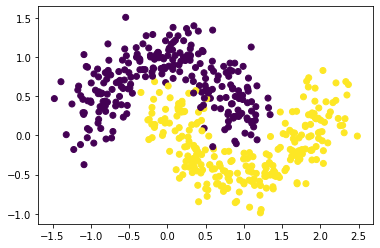

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

**Data preparing**

In [3]:
X = moons_points
y = moons_labels

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty ='l1', solver = 'liblinear', 
                        C = 0.5, random_state = 42) # add some params

svm = SVC(C = 10, kernel='linear', random_state = 42) # here too

### YOUR CODE HERE
lr.fit(X, y)
svm.fit(X, y);

In [5]:
from sklearn.metrics import f1_score

def get_score(clf, X = X):
    y_pred = clf.predict(X)
    return f1_score(y, y_pred)

lr: f1_score = 0.8588709677419355


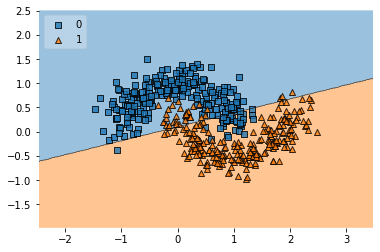

In [6]:
print(f'lr: f1_score = {get_score(lr)}')
plot_decision_regions(X, y, clf=lr, legend=2);

svm: f1_score = 0.8606060606060605


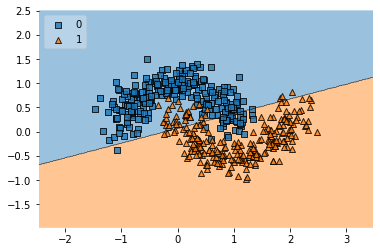

In [7]:
print(f'svm: f1_score = {get_score(svm)}')
plot_decision_regions(X, y, clf=svm, legend=2);

**Results:**
* one can see that without tuning models can't devide two class fully. 
* The models with such parameters can work only with linearly separable data.


## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

svm(poly): degree_opt = 3, coef0_opt = 0.5, 1_score = 0.9738430583501007


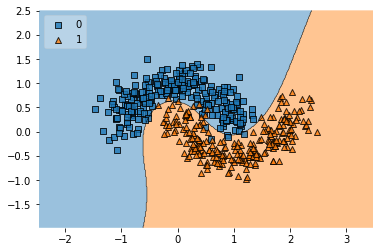

In [8]:
### YOUR CODE HERE
svm1 = SVC(kernel='poly', degree = 3, gamma = 'scale', coef0 = 0.5, random_state = 42)
svm1.fit(X, y)
plot_decision_regions(X, y, clf=svm1, legend=2);
print(f'svm(poly): degree_opt = 3, coef0_opt = 0.5, 1_score = {get_score(svm1)}')

svm(rbf): without tuning f1_score = 0.9738430583501007


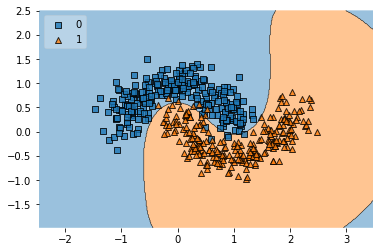

In [9]:
svm2 = SVC(kernel='rbf', gamma = 'scale', random_state = 42)
svm2.fit(X, y)
plot_decision_regions(X, y, clf=svm2, legend=2);
print(f'svm(rbf): without tuning f1_score = {get_score(svm2)}')

svm(sigmoid): C_opt = 5, gamma_opt = 0.08, coef0_opt = 0.5, f1_score = 0.8494845360824742


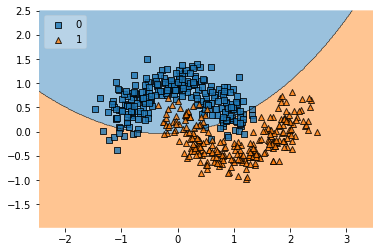

In [10]:
svm3 = SVC(C = 5, kernel='sigmoid', gamma = 0.08, coef0 = 0.5, random_state = 42)
svm3.fit(X, y)
plot_decision_regions(X, y, clf=svm3, legend=2);
print(f'svm(sigmoid): C_opt = 5, gamma_opt = 0.08, coef0_opt = 0.5, f1_score = {get_score(svm3)}')

**Answers:**

* Classification quality has increased
* Decision border has become non-linear
* I have chosen degree = 3, class boundary is 3-d degree polynomial

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

lr(X_poly): f1_score = 0.963855421686747


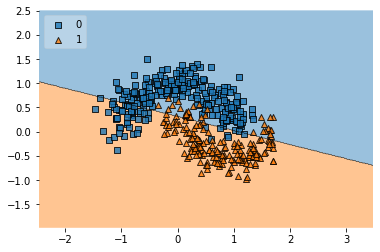

In [11]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
lr = LogisticRegression(solver = 'liblinear', random_state = 42)

lr.fit(X_poly, y)
print(f'lr(X_poly): f1_score = {get_score(lr, X_poly)}')

value = 0
width = 5
plot_decision_regions(X_poly, y, clf = lr, legend=2, feature_index =[1, 2],
                      filler_feature_values={8: value, 9: value, 0: value, 3: value, 
                                             4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={8: width, 9: width, 0: width, 3: width, 
                                             4: width, 5: width, 6: width, 7: width});

**Answers:**

* Quaily of classification is worse by 1 percent, border type is linear.
*  have used 3-d degree of polynomialFeatures, but svm with 3-d degree poly has showed better result by 1%. 

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

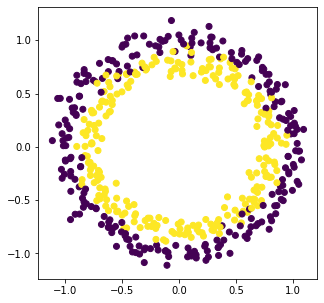

In [12]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

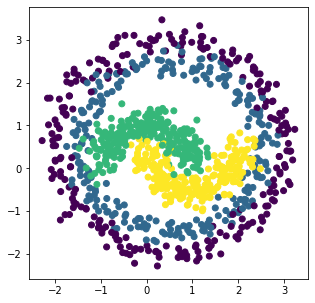

In [13]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [14]:
X = points
y = labels

lr(X_poly): wuthout tuning f1_score = 0.9209856718251709


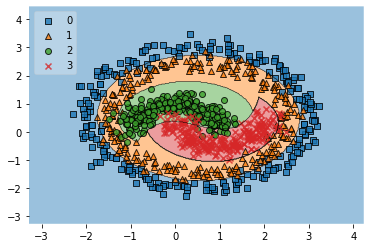

In [15]:
svm = SVC(kernel='rbf', gamma = 'scale', random_state = 42)
svm.fit(X, y)
y_pred = svm.predict(X)
score = f1_score(y, y_pred, average = 'macro')
print(f'lr(X_poly): wuthout tuning f1_score = {score}')
plot_decision_regions(X, y, clf=svm, legend=2);

lr(X_poly): f1_score = 0.9210220729983293


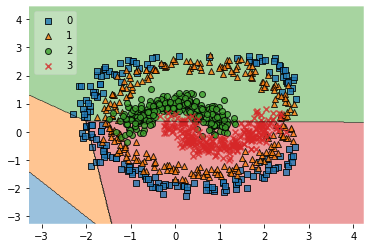

In [21]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
lr = LogisticRegression(multi_class='multinomial', solver = 'saga', max_iter = 5000, random_state = 42)

lr.fit(X_poly, y)
y_pred = lr.predict(X_poly)
score = f1_score(y, y_pred, average = 'macro')
print(f'lr(X_poly): f1_score = {score}')

# I don't fully understand how to draw decision regions correctly. So...
value = 0
width = 20
plot_decision_regions(X_poly, y, clf = lr, legend=2, feature_index =[1, 2],
                      filler_feature_values={8: value, 9: value, 0: value, 3: value, 
                                             4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={8: width, 9: width, 0: width, 3: width, 
                                             4: width, 5: width, 6: width, 7: width});

**Results:**
* svm with kernel = 'rbf' is the best model. It can work quiet well without tuning. That's exciting!
* logistic regression is good model when we use feature engineering(add polynomial features)